# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


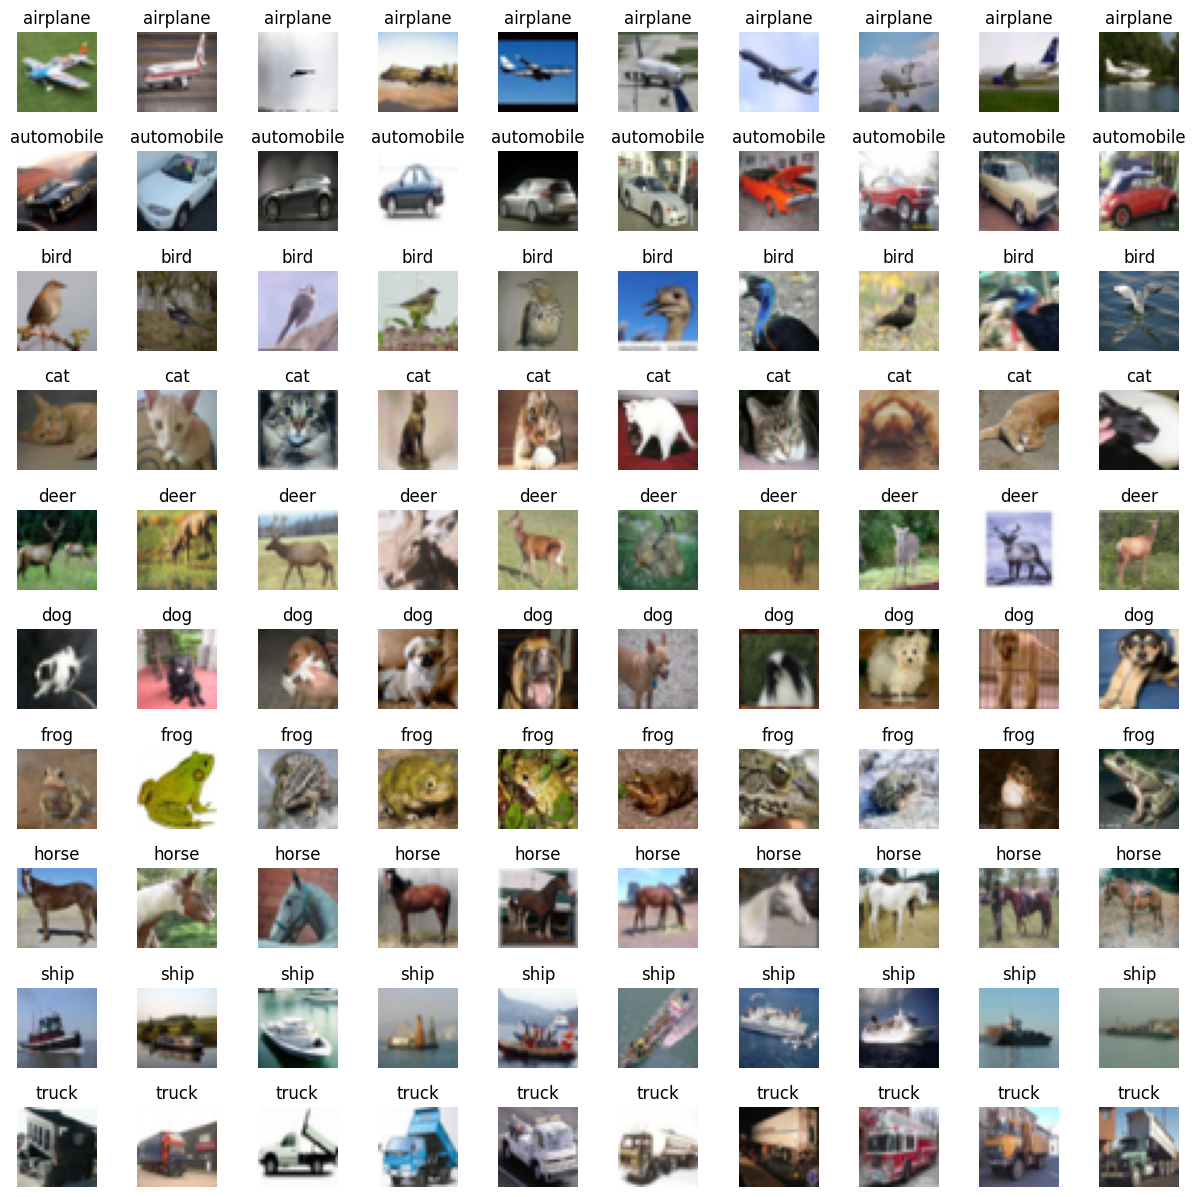

In [3]:
# Your code here :
# Define the class names

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot 10 random samples from each class
for class_idx, class_name in enumerate(class_names):
    class_indices = np.where(y_train == class_idx)[0]
    random_indices = np.random.choice(class_indices, 10, replace=False)
    for i, ax in enumerate(axes[class_idx]):
        ax.imshow(x_train[random_indices[i]])
        ax.set_title(class_name)
        ax.axis('off')

plt.show()


In [4]:
# Your code here :

# Convert class vectors to binary class matrices (one hot encoding)
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Verify the shape and first label
print("Shape of y_train_one_hot:", y_train_one_hot.shape)

Shape of y_train_one_hot: (50000, 10)


In [5]:
#Normalize the images

x_train_norm = x_train.astype('float32') / 255
x_test_norm = x_test.astype('float32') / 255

print('shape of x train normalized', x_train_norm.shape)
print('shape of x test normalized', x_test_norm.shape)




shape of x train normalized (50000, 32, 32, 3)
shape of x test normalized (10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [6]:
from keras.backend import clear_session
clear_session()

In [7]:
# Your code here :

# from convolutional front end a single dense layer with a filter size of 3x3 and 32 filters and a
#max pooling layer with a input shape of 32x32x3 the filter maps is flattened and fed to a dense layer with 100 neurons and a softmax activation function

from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
# Your code here :

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_norm, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test_norm, y_test_one_hot))



Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.1507 - loss: 2.2697 - val_accuracy: 0.2311 - val_loss: 2.1767
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2400 - loss: 2.1419 - val_accuracy: 0.2599 - val_loss: 2.0540
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2803 - loss: 2.0279 - val_accuracy: 0.3014 - val_loss: 1.9723
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3073 - loss: 1.9686 - val_accuracy: 0.3221 - val_loss: 1.9321
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3310 - loss: 1.9192 - val_accuracy: 0.3487 - val_loss: 1.8919
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3450 - loss: 1.8817 - val_accuracy: 0.3408 - val_loss: 1.8742
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3532 - loss: 1.8550 - val_accuracy: 0.3590 - val_loss: 1.8520
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3733 - loss: 1.8174 - val_accuracy: 0.3519 - v

*   Plot the cross entropy loss curve and the accuracy curve

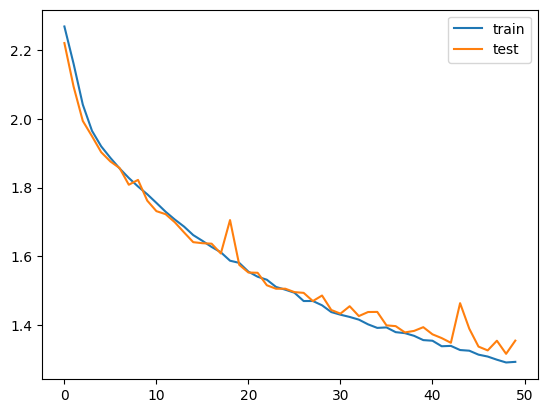

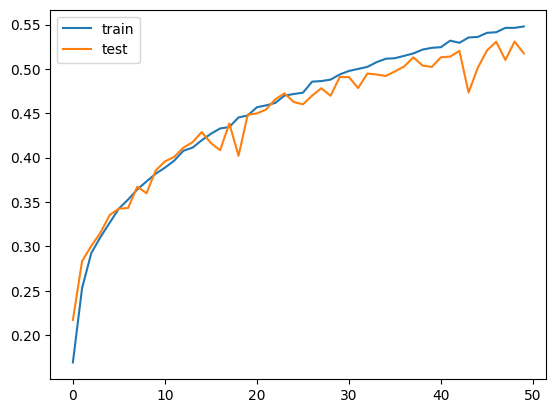

In [ ]:
# Your code here :

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 933,162 (3.56 MB)

 Trainable params: 933,162 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_norm, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test_norm, y_test_one_hot))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.1276 - loss: 2.2825 - val_accuracy: 0.2164 - val_loss: 2.2278
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2264 - loss: 2.1928 - val_accuracy: 0.2933 - val_loss: 2.0466
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2807 - loss: 2.0207 - val_accuracy: 0.2564 - val_loss: 2.0437
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3012 - loss: 1.9723 - val_accuracy: 0.3397 - val_loss: 1.8906
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3322 - loss: 1.8999 - val_accuracy: 0.3362 - val_loss: 1.8933
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3501 - loss: 1.8614 - val_accuracy: 0.3706 - val_loss: 1.8099
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3645 - loss: 1.8217 - val_accuracy: 0.3735 - val_loss: 1.7858
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3792 - loss: 1.7803 - val_accuracy: 0.3848 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


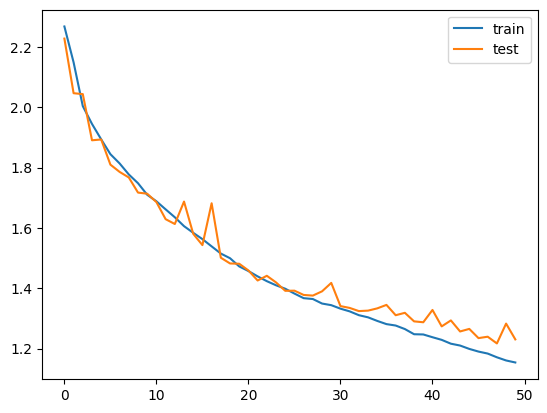

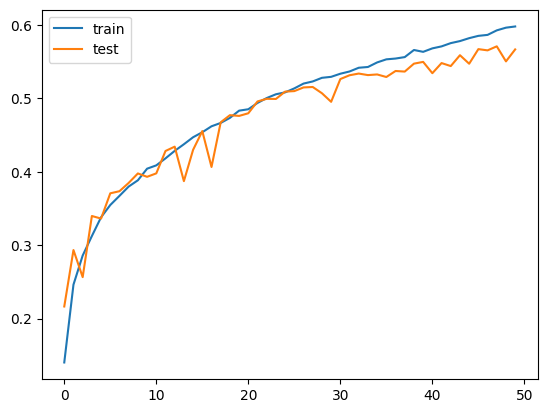

In [ ]:
# Your code here :

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


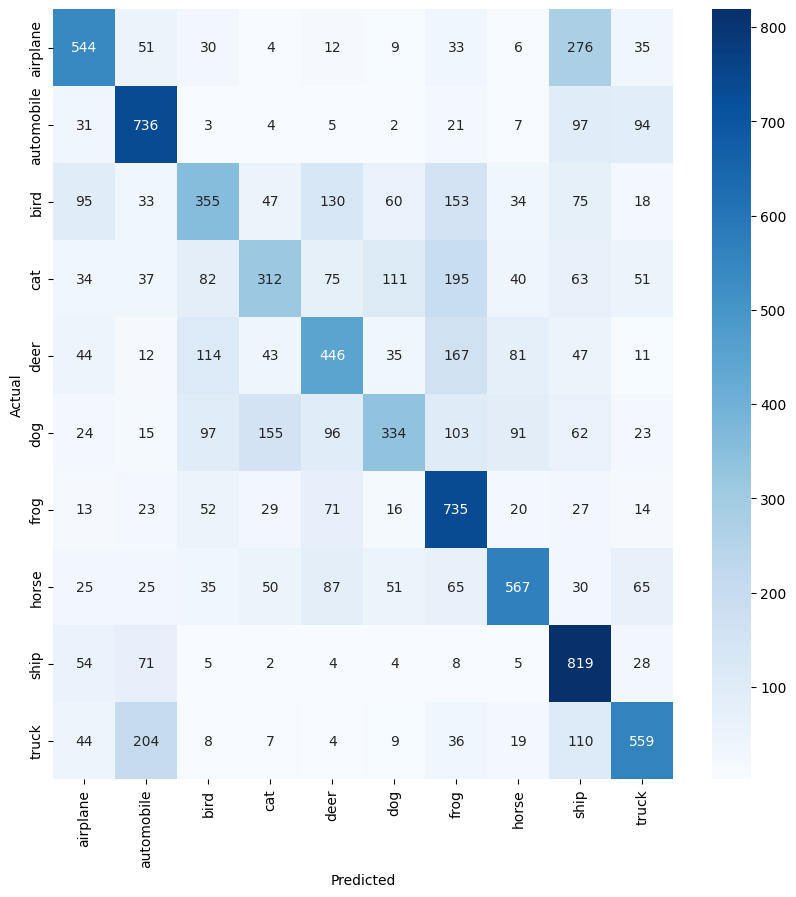

In [10]:
# Your code here :

y_pred = model.predict(x_test_norm)
y_pred = np.argmax(y_pred, axis=1)

#confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [11]:
# Your code here :

print('Test accuracy:', np.mean(y_test == y_pred))


Test accuracy: 0.1


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [12]:
from keras.backend import clear_session
clear_session()

In [15]:
# Your code here :
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()

# First stack of two Conv layers with 64 filters, followed by MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Second stack of two Conv layers with 128 filters, followed by MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Third stack of two Conv layers with 256 filters, followed by MaxPooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output layer with 10 classes (assuming a 10-class classification problem)
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,671,114 (6.37 MB)

 Trainable params: 1,671,114 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 310ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1033 - val_loss: 2.2986
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.1039 - loss: 2.2975 - val_accuracy: 0.1049 - val_loss: 2.2928
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.1095 - loss: 2.2909 - val_accuracy: 0.1101 - val_loss: 2.2804
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.1203 - loss: 2.2744 - val_accuracy: 0.1478 - val_loss: 2.2450
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.1690 - loss: 2.2239 - val_accuracy: 0.1969 - val_loss: 2.1455
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.2266 - loss: 2.1212 - val_accuracy: 0.2908 - val_loss: 2.0111
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.2713 - loss: 2.0420 - val_accuracy: 0.3083 - val_loss: 1.9462
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.2933 - loss: 1.9920 - val_accura

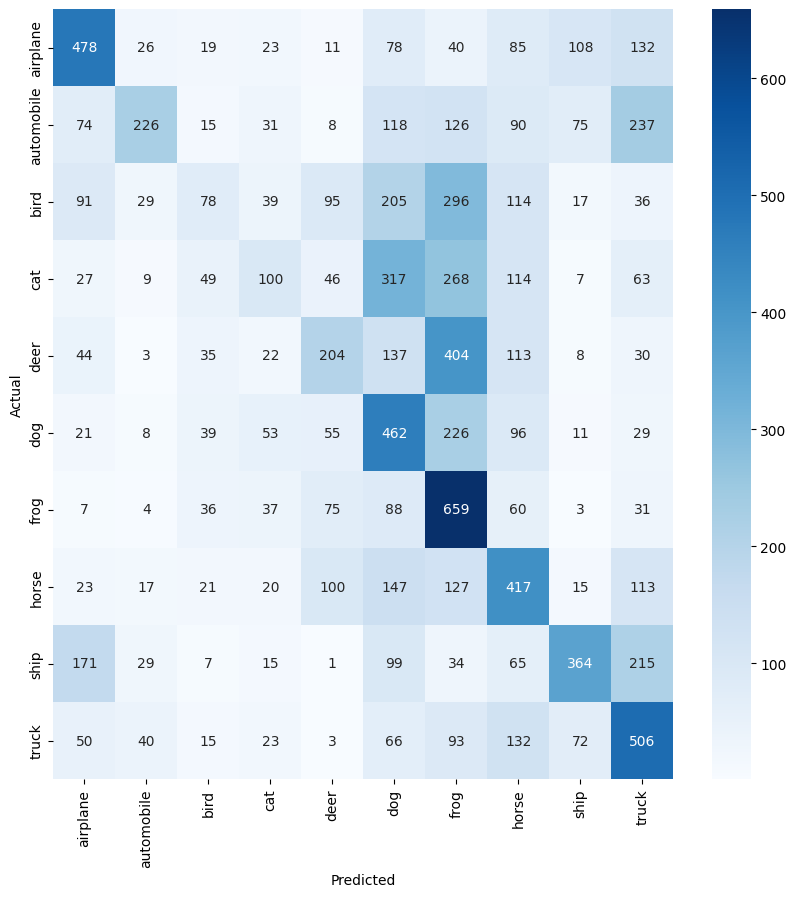

In [16]:
# Your code here :
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_norm, y_train_one_hot, epochs=10, batch_size=512, validation_data=(x_test_norm, y_test_one_hot))

#predict the output for the test split and plot the confusion matrix

y_pred = model.predict(x_test_norm)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

To learn complex patterns, capture non-linear relationships in my data

_

2 - Key Differences between sigmoid and softmax:

the sigmoid, produces and output of 0 and 1 does a binary classification;
the softmax - best for multiclass outcomes with mutually categories

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Binary crossentropy is for yes/no problems (true or false)
Categorical crossentropy is for picking from many choices and gets the score
_
